In [1]:
# Run some setup code for this notebook.
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
# print(y_test)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [ ]:
num_label_train = [0,0,0,0,0,0,0,0,0,0]
for i in range(y_train.shape[0]):
    num_label_train[y_train[i]] += 1
                   
                 
num_label_test = [0,0,0,0,0,0,0,0,0,0]
for i in range(y_train.shape[0]):   
    num_label_test[y_test[i]] += 1

In [4]:
print(y_train)

[6 9 9 ... 9 1 1]


In [3]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [4]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


(3072,)
[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


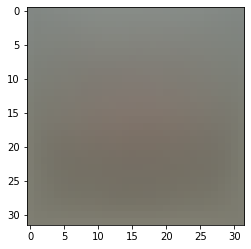

Training data shape:  (49000, 3072)


In [5]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image.shape)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

# second: subtract the mean image from train and test data

print('Training data shape: ', X_train.shape)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image


In [6]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.svm
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [8]:
train_X = X_val
train_Y = y_val
# train_X = X_dev
# train_Y = y_dev

import time
tic = time.time()

clf = SVC(kernel='sigmoid') #引入sigmoid核 函数  K(x,z)=tanh（vx ∙ z+c)
# coef0 = np.linspace(-5, 0, 10)
C = [0.1,1,10,100]
coef0 = [-5,-4,-3,-2,-1,0]
gamma = [1,2,3,4,5]
param_grid = {'C':C,'coef0': coef0,'gamma': gamma}
clf = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)
clf.fit(train_X,train_Y)
print("最优参数:{},对应score:{}".format(clf.best_params_, clf.best_score_))
print("最优clf:{}".format(clf.best_estimator_))

toc = time.time()
print('Time:computed in %fs' % (toc - tic))


最优参数:{'C': 0.1, 'coef0': -5, 'gamma': 1},对应score:0.1799913686141231
最优clf:SVC(C=0.1, coef0=-5, gamma=1, kernel='sigmoid')
Time:computed in 1485.183693s


In [15]:
train_X = X_val
train_Y = y_val
clf = SVC(kernel='sigmoid')
clf.fit(train_X,train_Y)
score_train = clf.score(train_X,train_Y)
# score_test = clf.score(test_X,test_Y)


print(clf.decision_function(train_X))

print(clf.support_vectors_)

[[6.29787749 9.31211917 3.74158745 ... 1.70692029 7.29443993 7.30574683]
 [6.3066325  0.68230806 3.72575654 ... 6.2785768  5.26571652 1.69969564]
 [3.09794591 9.28831235 4.88536752 ... 4.02440654 7.20890369 7.2011288 ]
 ...
 [6.25459276 6.17414676 0.70216774 ... 2.71977758 9.3183385  8.307876  ]
 [9.31162612 5.24409952 2.77243623 ... 1.77997474 8.2981386  7.25588674]
 [2.80004713 7.26684128 5.25536208 ... 6.28821392 0.7045322  9.29417643]]
[[ -21.64189796    6.01826531   44.52608163 ...  -80.64218367
   -84.86195918  -75.39957143]
 [-122.64189796  -93.98173469  -26.47391837 ...    3.35781633
    14.13804082   67.60042857]
 [  -9.64189796   34.01826531   56.52608163 ...  -69.64218367
    11.13804082   40.60042857]
 ...
 [  16.35810204   -5.98173469  -71.47391837 ...    4.35781633
    -5.86195918  -24.39957143]
 [  98.35810204   97.01826531  113.52608163 ...    6.35781633
     6.13804082   12.60042857]
 [ -95.64189796   42.01826531  102.52608163 ... -114.64218367
   -94.86195918  -64.399

In [16]:
juece = clf.decision_function(train_X)
sv = clf.support_vectors_

In [17]:
print(juece.shape)
print(sv.shape)

(1000, 10)
(973, 3072)


In [21]:
w = clf.dual_coef_
print(w.shape)
w =clf.intercept_
print(w.shape)

(9, 973)
(45,)


In [ ]:
def pca(data_train,data_test):
#     print("原来数据：\n",data_train,data_test)
    # 实例化转换器类
    transfer = PCA(n_components = 10)
    pca_model = transfer.fit(data_train)
    data_new1 = pca_model.transform(data_train)
    data_new2 = pca_model.transform(data_test)    
    print("处理后结果：\n",data_new1,data_new2)
    print("处理后shape：\n",data_new1.shape,data_new2.shape)
    
    return data_new1,data_new2

train_pca,test_pca = pca(train_X,train_Y)

In [7]:

train_X = X_val
train_Y = y_val
test_X = X_dev
test_Y = y_dev

In [11]:
import time
# print("start")
start = time.time()
svm_sigmoid = SVC(kernel='sigmoid',gamma = 1,coef0=-0.001)

svm_sigmoid.fit(train_X,train_Y)
score_train = svm_sigmoid.score(train_X,train_Y)
print("Train score :",score_train)
score_test = svm_sigmoid.score(test_X,test_Y)
print("Test score :",score_test)
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))
time =  6993.044922
print("Time:%dh %dmin %f s" %(time/3600,time/60%60,time%60))

Train score : 0.105
Test score : 0.116
Time: 0h 0min 8.497122 s
Time:1h 56min 33.044922 s
